## Carregamento dos dados

* **Foi ser necessário carregar por fases, visto que são muitos dados**

In [1]:
import pandas as pd

### Função que verifica a existencia de valores nulos e conta-os por coluna. Para além disso junta as linhas completas

In [2]:
def processa_chunk(ms, valores, ds):
    if(valores is None): valores = ms.isnull().sum()
    else: valores += ms.isnull().sum()
        
    if(ds is None): ds = ms.dropna()
    else: ds = pd.concat([ds,ms.dropna()],ignore_index=True)
    print('feito')
    return (valores, ds)

In [3]:
chunksize = 0.5 * (10 ** 6)
nlinhas = 0
valores = None
ds = None
'''for ms in pd.read_csv('../train.csv', low_memory=False, chunksize = chunksize):
    nlinhas += ms.shape[0]
    (valores, ds) = processa_chunk(ms, valores, ds)
'''
ms = pd.read_csv('../../sample_train.csv', low_memory=False)
(valores, ds) = processa_chunk(ms, valores, ds)

feito


In [4]:
nlinhas = ms.shape[0]
nlinhas

600000

#### Transforma o número de valores nulos em percentagem

In [10]:
print(valores)
percentagem = valores / nlinhas

MachineIdentifier                               0
ProductName                                     0
EngineVersion                                   0
AppVersion                                      0
AvSigVersion                                    0
IsBeta                                          0
RtpStateBitfield                             2169
IsSxsPassiveMode                                0
DefaultBrowsersIdentifier                  570894
AVProductStatesIdentifier                    2403
AVProductsInstalled                          2403
AVProductsEnabled                            2403
HasTpm                                          0
CountryIdentifier                               0
CityIdentifier                              21668
OrganizationIdentifier                     185073
GeoNameIdentifier                              15
LocaleEnglishNameIdentifier                     0
Platform                                        0
Processor                                       0


#### Remove as que têm 0 valores nulos

In [14]:
type(percentagem)
percentagem = percentagem[percentagem != 0]

#### Divide as colunas em percentagem de valores nulos:

- 0% a 25%: baixa
- 25% a 50%: média baixa
- 50% a 75%: média alta
- 75% a 100%: alta

In [15]:
alta = percentagem[percentagem >= 0.75]
mediaAlta = percentagem[(percentagem >= 0.5) & (percentagem < 0.75)]
mediaBaixa = percentagem[(percentagem >= 0.25) & (percentagem < 0.5)]
baixa = percentagem[percentagem < 0.25]

In [16]:
alta

DefaultBrowsersIdentifier     0.951490
PuaMode                       0.999772
Census_ProcessorClass         0.995868
Census_IsFlightingInternal    0.830583
dtype: float64

In [17]:
mediaAlta

Census_InternalBatteryType    0.710528
Census_ThresholdOptIn         0.635395
Census_IsWIMBootEnabled       0.634527
dtype: float64

In [18]:
mediaBaixa

OrganizationIdentifier    0.308455
SmartScreen               0.356113
dtype: float64

In [19]:
baixa

RtpStateBitfield                                     0.003615
AVProductStatesIdentifier                            0.004005
AVProductsInstalled                                  0.004005
AVProductsEnabled                                    0.004005
CityIdentifier                                       0.036113
GeoNameIdentifier                                    0.000025
OsBuildLab                                           0.000003
IsProtected                                          0.003975
SMode                                                0.060155
IeVerIdentifier                                      0.006642
Firewall                                             0.010312
UacLuaenable                                         0.001175
Census_OEMNameIdentifier                             0.010677
Census_OEMModelIdentifier                            0.011478
Census_ProcessorCoreCount                            0.004822
Census_ProcessorManufacturerIdentifier               0.004822
Census_P

### Verifica quantas linhas completas existem no dataset

In [11]:
ds

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0002f5f3230e185c7268ce887408baa6,win8defender,1.1.15100.1,4.13.17134.1,1.273.1140.0,0,7.0,0,146.0,7945.0,...,33160.0,1,0.0,0.0,1,0,0.0,1.0,10.0,0
1,000505f06468f4e0c850695370a8a1cf,win8defender,1.1.13303.0,4.12.16299.15,1.233.3338.0,0,7.0,0,1823.0,11280.0,...,9554.0,0,0.0,0.0,0,0,0.0,1.0,6.0,0
2,0008b95fbc3c59261d80cf5b7490091d,win8defender,1.1.15200.1,4.8.10240.17443,1.275.1075.0,0,7.0,0,890.0,53447.0,...,63317.0,1,0.0,0.0,0,0,0.0,0.0,6.0,0
3,001d75afb93d89f52da2d9a5c79a332f,win8defender,1.1.14405.2,4.11.15063.447,1.259.16.0,0,7.0,0,1632.0,53447.0,...,63370.0,0,0.0,0.0,0,0,0.0,0.0,8.0,1
4,001e290cb2b27b10a2d8e9993d7f06df,win8defender,1.1.15100.1,4.10.14393.0,1.273.1327.0,0,7.0,0,1727.0,46669.0,...,33066.0,1,0.0,0.0,0,0,0.0,0.0,10.0,1
5,002e491a04f1ffcf1d1f1d5566f78ee9,win8defender,1.1.15200.1,4.11.15063.447,1.275.810.0,0,7.0,0,2725.0,3371.0,...,20317.0,0,0.0,0.0,0,0,0.0,1.0,4.0,1
6,003688f30aa6b9a7d54d74c460b4dc01,win8defender,1.1.15200.1,4.8.10240.16384,1.275.1712.0,0,7.0,0,2189.0,53447.0,...,19946.0,0,0.0,0.0,0,0,0.0,0.0,8.0,1
7,0042b5bd790bb07bce5f64126fbaf5e9,win8defender,1.1.13701.0,4.10.14393.1794,1.241.1226.0,0,7.0,0,1926.0,22396.0,...,63103.0,0,0.0,0.0,0,0,0.0,0.0,15.0,0
8,0047acc97106f6e699efb17fc705863f,win8defender,1.1.14306.0,4.13.17134.228,1.257.660.0,0,7.0,0,1910.0,55784.0,...,15350.0,0,0.0,0.0,0,0,0.0,0.0,15.0,0
9,004afca420495a49d50664398fd58115,win8defender,1.1.15200.1,4.8.10240.17609,1.275.388.0,0,7.0,0,2723.0,53447.0,...,9802.0,1,0.0,0.0,0,0,0.0,0.0,10.0,1


In [20]:
ms[ms['HasDetections']  == 0].shape

(299923, 83)

In [21]:
ms[ms['HasDetections']  == 1].shape

(300077, 83)

In [32]:
msN = ms[['AVProductsInstalled',
'AVProductsEnabled',
'Census_ProcessorCoreCount',
'Census_PrimaryDiskTotalCapacity',
'Census_SystemVolumeTotalCapacity',
'Census_TotalPhysicalRAM',
'Census_InternalPrimaryDiagonalDisplaySizeInInches',
'Census_InternalPrimaryDisplayResolutionHorizontal',
'Census_InternalPrimaryDisplayResolutionVertical',
'Census_InternalBatteryNumberOfCharges']]

(421483, 10)


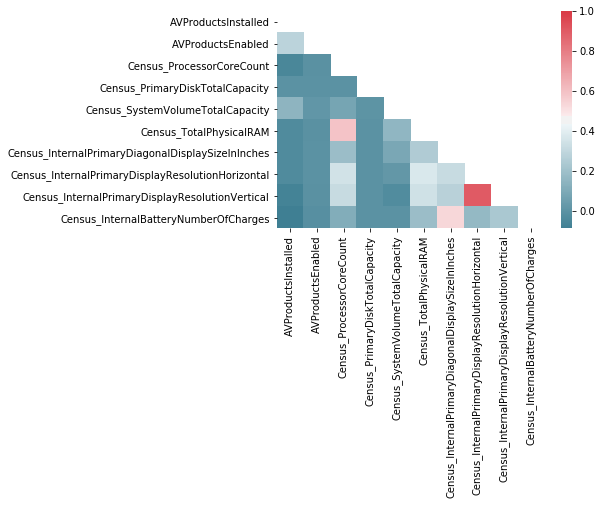

In [41]:
print(msN.shape)
import seaborn as sns
import numpy as np
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(msN.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(msN.corr(), cmap=cmap, mask=mask)